# Laplacian Eigenmaps 
Author: Chris Nunn

[Theory](#linkTheory)  <br>
[Example 1: The severed Sphere](#linkExample1)  <br>
[Example 2: Image Feature Extraction](#linkExample2) <br>
[Example 3: Connection to Fourier Transforms in image feature extraction](#linkExample3) <br>
[Resources](#linkResources)  

### Theory<a id='linkTheory'></a>

Laplacian Eigenmaps is a nonlinear dimensionality reduction technique. As we saw in the spectral clustering presentation, a graph containing neighbourhood information in the high dimensional space is converted to a low dimensional representation using the idea of the Laplacian. 

#### The LEM algorithm:

Consider $N$ points $\vec{x_i} . . . \vec{x_N}$ in $\mathbb{R}^p$. A weighted graph is constructed with a node for each point and edges connecting neighbouring points. The embedding map is calculated by computing the eigenvectors of the graph's Laplacian.

1. Construct adjacency graph. Edges are placed between points  $\vec{x_i}$ and $\vec{x_j}$ if they are neighbours:

    (i) Can use $\epsilon$ neighbourhoods to determine whether or not points are neighbours (produces disconnected graphs).
   
    (ii) Can use k nearest neighbours (which produces connected graphs). 
    
    
2. Compute the edge weights $W_{ij}$.

    (i) No parameters, so $W_{ij}=1$ if $i$ and $j$ are connected and $W_{ij}=0$ if not.
    
    (ii) Heat kernel, where connected nodes have edge weights given by:
   
   $$W_{ij} = e^-\frac{||\vec{x_i} - \vec{x_j}||^2}{t}$$

where $t\in\mathbb{R}$.

3. On connected graph components ($G$) from above, compute eigenvalues and eigenvectors for the following generalized eigenvector problem:

$$L\vec{f} = \lambda D\vec{f}$$

Where $D$ is the diagonal weight matrix, $D_{ii} = \sum_jW_{ji}$, and $L = D - W$ the Laplacian. Note that $L$ will be symmetric and positive semi-definite.

If one orders the eigenvalue, eigenvector pairs according to their eigenvalues, the eigenvectors corresponding to the $m$ smallest nonzero eigenvalues represent the embedding in $m<p$ dimensional space, so that:

$\vec{x_i} -> [f_1(i),....,f_m(i)]^T$

#### Motivation for step 3, the Laplacian Eigenvector problem

Consider a weighted graph consisting of $N$ nodes, and edges constructed as above. Here we will consider a mapping from $\mathbb{R}^p$ to a line, $\vec{y} = (y_1,y_2,y_3,..,y_N)^T$.

A good mapping preserves the true closeness and separation of points in 1D, so the goal is to minimize the following cost function:

$$C = \sum_{ij}(y_i-y_j)^2 W_{ij}$$

Note that we can write this in matrix notation using the definition of the Laplacian defined above, $L = D - W$, where $D_{ii} = \sum_j W_{ij}$:

$$C = \sum_{ij} (y_i^2 + y_j ^2 -2y_iy_j)W_{ij}\\
= \sum_i y_i^2 \sum_j W_{ij} + \sum_j y_j^2 \sum_i W_{ij} -2\sum_{ij}y_iy_jW_{ij}\\
= \sum_i y_i^2 D_{ii} + \sum_j y_j^2 D_{jj} -2\sum_{ij}y_iy_jW_{ij}\\
= 2\vec{y}^T D \vec{y} - 2 \sum_{ij}y_iy_jW_{ij}\\
= 2\vec{y}^T L \vec{y}
$$

So the minimization problem can be framed as the following, subject to two constraints:

$$argmin_\vec{y}C$$

(i) $\vec{y}^TD\vec{y} = 1$. This normalizes the embedding, eliminating arbitrary scaling factors. 
    
(ii) $\vec{y}^TD\vec{1} = 0$. This eliminates the constant vector which has eigenvalue zero. The authors suggest this can be interpreted as removing translational invariance in the mapping.

*Note here that these look very similar to the constraints we looked at in Local Linear Embedding. In LLE we centered vectors at the origin to remove translational invariance which would give us infinite solutions, and normalized the contributions of each point in a neighbourhood to the reconstruction error.

Performing this minimization and imposing constraints with Lagrange multipliers looks like:

$$\mathcal{L} = \vec{y}^TL\vec{y} - \lambda (\vec{y}^tD\vec{y} -1) -\alpha (\vec{y}^tD\vec{1}) $$

$$\frac{\partial \mathcal{L}}{\vec{y}} = 2L\vec{y} -\lambda(2D\vec{y}) - \alpha(D\vec{1}) = 0$$

$$\frac{\partial \mathcal{L}}{\lambda} = -\vec{y}^TD\vec{y} + 1=0$$

$$\frac{\partial \mathcal{L}}{\alpha} = D\vec{1} =0$$

Taking $\alpha=0$ gives the general eigenvector problem:

$$L\vec{y} = \lambda D \vec{y}$$

We can extend this to $m$ dimensions by taking $m$ eigenvectors with the smallest corresponding eigenvalues.


#### Why the Laplacian? : Laplace Beltrami operator and preserving locality of points

- The geometry of the manifold (from which the points are sampled) is approximated by the adjacency graph

- The Laplace Beltrami operator is approximated by the Laplacian of the weighted adjacency graph

- The Laplace Beltrami operator provides an optimal embedding for the manifold, so the embedding maps approximate the eigenmaps of this operator. 

Some intuition to connect the Laplacian of the graph to the Laplace Beltrami operator on manifolds (in leiu of the mathematical treatment in the original paper):

Consider a 1D mapping of the manifold $f: \mathcal{M} \mapsto \mathbb{R}$. The magnitude of the gradient of a mapping describes how far apart nearby points are mapped ($||\nabla f||$). To preserve the locality of points in the high dimensional space, we wish to minimize the average magnitude of the gradient over neighbourhoods of the manifold $\int_\mathcal{M}||\nabla f||^2$ (which is apparently equivalent to $\int_\mathcal{M}L(f)f$ by Stokes' theorem?) . On our graph, this corresponds to minimizing $Lf = \sum_{ij}(f_i -f_j)^2 W_{ij}$. 

#### Connection to LLE
As alluded to above, under certain conditions, the matrix $M = (I - W)^T(I-W) \approx \frac{1}{2}L^2f$. So the eigenvectors of $L$ coincide with the eigenvectors of $M$.

*Recall that in Local Linear Imbedding we were minimizing the reconstruction error $\phi = \vec{y}^T M \vec{y}$ with repespect to the low dimensional representation $\vec{y}$. 

So in some sense, instead of calculating weights to describe the local linear manifold geometry and then finding the embedding best described by these weights, in LEM we begin with weights that preseve the closeness of points because they approximate the Laplacian of the graph, which we then minimize with respect to the embedding.  
  
This means LEM should behave quite similarly to LLE.
  
#### Connection to Spectral Clustering

See examples below.

#### Discussion
(1) What type of problem is LEM often applied to?

(2) Does it behave similarly to LLE in most situations we can come up with?

(3) In feature extraction in images (which might be an application), how does it compare to fourier transforms for example?

(4) Apply to some cool examples.

#### Code

In the following sections we have written some examples of LLE.

### Example 1: Severed Sphere<a id='linkExample1'></a>

In [2]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [3]:
# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

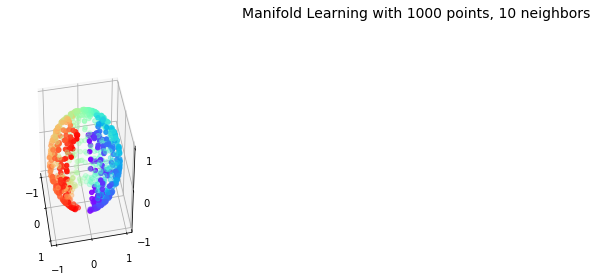

In [4]:
# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

Laplacian Eigenmap: 0.11 sec
standard: 0.14 sec
ltsa: 0.21 sec
hessian: 0.29 sec
modified: 0.24 sec


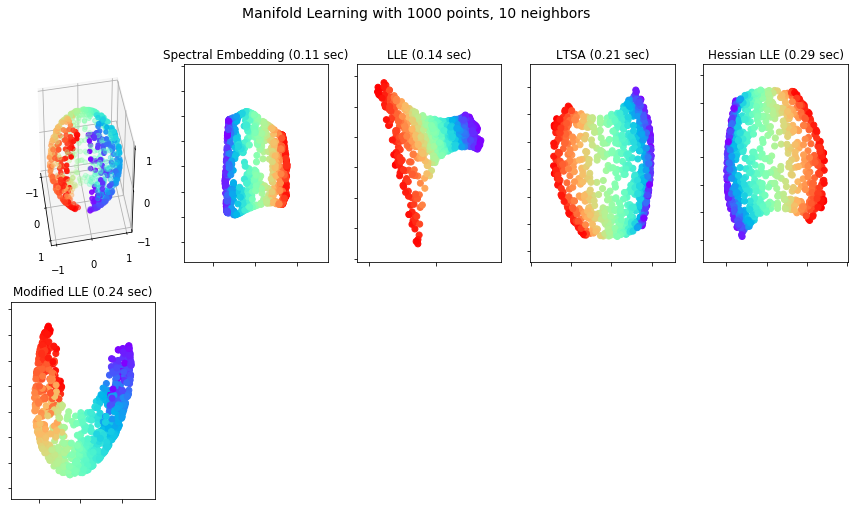

In [5]:
# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

#perform Laplacian Eigenmap
t0 = time()
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Laplacian Eigenmap: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(252)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Locally Linear Embedding Manifold learning to compare to LEM
methods = ['standard', 'ltsa', 'hessian', 'modified']
#methods = ['standard']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    trans_data = manifold\
        .LocallyLinearEmbedding(n_neighbors, 2,
                                method=method).fit_transform(sphere_data).T
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(253+i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


### Example 2: Image Feature Extraction  <a id='linkExample2'></a>

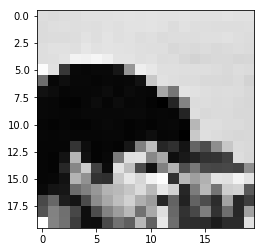

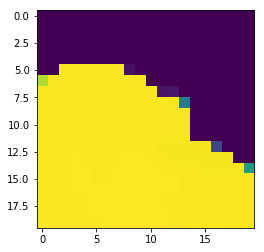

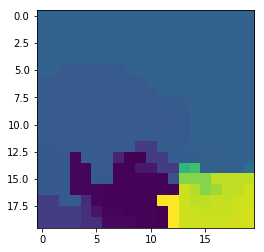

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from skimage.transform import rescale

N_components = 2
#grab an image and rescale + plot it
camera = data.camera()
img = []
for i in range(50,150):
    img.append(camera[i][200:300])

img = np.asarray(img)
rescaled_img = rescale(img, 0.2, mode="reflect")
plt.imshow(rescaled_img, cmap=plt.cm.gray)
plt.show()

#construct weight matrix and perform Laplacian Eigenmap 
graph = image.img_to_graph(rescaled_img)
#print graph
#plt.imshow(graph.reshape(400,400))
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

se = manifold.SpectralEmbedding(affinity="precomputed",n_components=N_components)
trans_data = se.fit_transform(graph.toarray()).T

#plt.imshow(rescaled_img, cmap=plt.cm.gray)
for i in range(N_components):
    plt.imshow(trans_data[i].reshape(20,20))
    plt.show()
    

Spectral clustering: kmeans, 0.37s
Spectral clustering: discretize, 0.37s


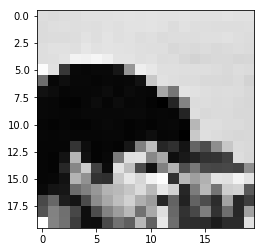

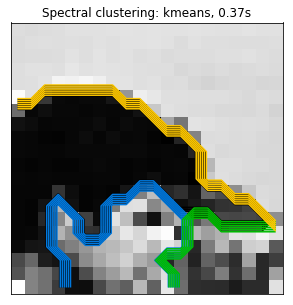

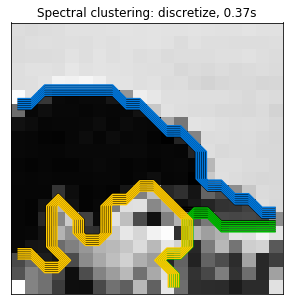

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from skimage.transform import rescale

camera = data.camera()
N_REGIONS = 4
img = []
for i in range(50,150):
    img.append(camera[i][200:300])
    
img = np.asarray(img)
rescaled_img = rescale(img, 0.2, mode="reflect")
plt.imshow(rescaled_img, cmap=plt.cm.gray)
    
graph = image.img_to_graph(rescaled_img)
               
# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps
    
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=42)
    t1 = time.time()
    labels = labels.reshape(rescaled_img.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(rescaled_img, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

### Example 3: Connection to Fourier Transforms Used in Feature Extraction<a id='linkExample3'></a>

Imagine decomposing an image into its frequency components in a discrete Fourier transform (with the number of potential frequencies limited to pixels for visualization).

Where the intensity (amplitude) varies rapidly across pixels the high frequency components contribute most. So both edges of well defined objects in the image, and likely noise will be mainly decomposed into high frequncy components.

Lets look at our face image in frequency space:

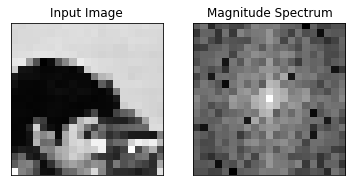

In [57]:
import cv2
import numpy as np
from skimage import data
from matplotlib import pyplot as plt

camera = data.camera()
N_REGIONS = 4
img = []
for i in range(50,150):
    img.append(camera[i][200:300])
    
img = np.asarray(img)
rescaled_img = rescale(img, 0.21, mode="reflect")

f = np.fft.fft2(rescaled_img)
fshift = np.fft.fftshift(f) #shift zero frequency to middle from top left corner
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(rescaled_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

The high intensity pixel in the centre of the magnitude spectrum indicates the significant contribution of a uniform background (non edge-like, and low frequency).

So lets get rid of the low frequencies and take the inverse Fourier transform:

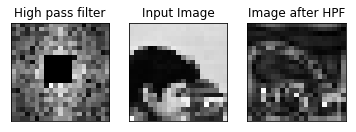

In [71]:
rows, cols = rescaled_img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-3:crow+3, ccol-3:ccol+3] = 0
magnitude_HPF = 20*np.log(np.abs(fshift)+1)

#show the magnitude spectrum again
plt.subplot(131),plt.imshow(magnitude_HPF, cmap = 'gray')
plt.title('High pass filter'), plt.xticks([]), plt.yticks([])

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(132),plt.imshow(rescaled_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
#plt.subplot(133),plt.imshow(img_back)
#plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


What does the Laplacian look like under a FT?

(Text(0.5,1,'FFT of Laplacian Mask'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

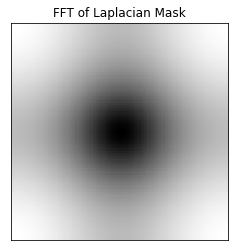

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# laplacian kernel (just sum of second derivatives of intensity function in x-y)
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

dft = np.fft.fft2(laplacian,[100,100])
fft_shift = np.fft.fftshift(dft)
mag_spectrum = np.log(np.abs(fft_shift) + 1)

plt.imshow(mag_spectrum, cmap = 'gray')
plt.title('FT of Laplacian Mask'), plt.xticks([]), plt.yticks([])



So the Laplacian is a high pass filter! Might be useful as a slightly different perspective on why the eigenvectors delineate the object boundaries in images.

### Resources<a id='linkResources'></a>

[classic paper](http://www2.imm.dtu.dk/projects/manifold/Papers/Laplacian.pdf)

[scikit spectral clustering API + examples](https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_segmentation.html#sphx-glr-auto-examples-cluster-plot-coin-segmentation-py)

[OpenCV FFT API + examples](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
